## iPyLeaflet
[ipyleaflet](https://github.com/ellisonbg/ipyleaflet) is a bridge between jupyter notebooks and the [leaflet](http://leafletjs.com/)  javascript library for drawing maps.

ipyleaflet comes with a few examples notebooks (this notebook was derived from one) but very little documentation,
for more documentation read the [Leaflet IPA](http://leafletjs.com/reference.html)

For installation directions, see the README on [ipyleaflet](https://github.com/ellisonbg/ipyleaflet)

[GeoJson](https://tools.ietf.org/html/rfc7946#section-3.1.7) is a good way to add data on top of an ipyleaflet map.

For other backgrounds than open streets, you can alter the ipyleaflet.py file to point to one of [these map providers](https://leaflet-extras.github.io/leaflet-providers/preview/)

In [2]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

## Visualizing the distribution of the observations

## Load the required libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
import pylab as plt

import sys
sys.path.append('./lib')

from leaflet import *

In [4]:
data_dir = "../../Data/Weather/"
from pickle import load
with open(data_dir+'/PRCP_residuals_PCA.pickle','rb') as file:
    Res_eig=load(file)
print Res_eig.keys()

#stations.pkl
with open(data_dir+'/stations.pkl','rb') as file:
    Stations=load(file)
Stations.head()


['eigen-vecs', 'stations']


,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930.0
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0


In [5]:
import pandas as pd
Eig=pd.DataFrame(Res_eig['eigen-vecs'].transpose())
Eig.head()

,0,1,2,3
0,-0.328393,0.151364,0.063649,0.129379
1,-0.199055,-0.087515,0.122807,-0.221739
2,-0.220120,-0.101124,0.141178,-0.266317
3,-0.171414,-0.092696,0.119665,-0.281630
4,-0.132952,-0.092493,0.067096,-0.274945


In [6]:
Eig['station']=Res_eig['stations']
Eig=Eig.set_index('station')
print Res_eig['stations'][:5]
Eig.head()

[u'USC00324418', u'USC00327986', u'USC00213104', u'USC00325660', u'USC00213463']


,0,1,2,3
station,,,,
USC00324418,-0.328393,0.151364,0.063649,0.129379
USC00327986,-0.199055,-0.087515,0.122807,-0.221739
USC00213104,-0.220120,-0.101124,0.141178,-0.266317
USC00325660,-0.171414,-0.092696,0.119665,-0.281630
USC00213463,-0.132952,-0.092493,0.067096,-0.274945


In [7]:
table=Eig.join(Stations,how='left')

In [8]:
table=table[['name','latitude','longitude','elevation',0,1,2,3,4,5,6,7]]
table.head(4)

KeyError: '[4 5 6 7] not in index'

In [10]:
import pylab as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [16]:
colors

[u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf']

## Map

In [15]:
min_lat,max_lat,min_long,max_long = box = (42.1103, 42.6167, -72.6, -70.8)
min_long = -98.8667
min_lat = 46.3939
max_long = -95.0161
max_lat = 47.8769
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.6), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
for index,row in table.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    for col in range(4):
        _coef=row[col]
        if np.isnan(_coef):
            continue
        r=abs(_coef)/5
        #print r
        color=colors[col]
        signs=[[+1,+1],[+1,-1],[-1,-1],[-1,+1]]
        lat_sign,long_sign=signs[col]
        triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
        if _coef<0:
            poly= Polygon(locations=triangle, weight=0,
                    color=color, opacity=0, fill_opacity=0.7,
                    fill_color=color)
        else:
            poly= Polygon(locations=triangle, weight=2,
                    color=color, opacity=0.8, fill_opacity=0,
                    fill_color=color)
        m +=poly   
m    

### excercises:
* Add a legend that relates the colors to values.
* Leaflet supports a variety of maps. See if you can get a topographical map as the background.

KeyError: 'avg(coeff_1)'

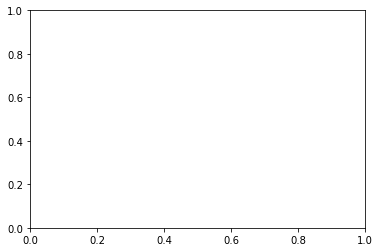

In [20]:
%matplotlib inline
Stations.plot.scatter(x='elevation',y='avg(coeff_1)');

In [21]:
table

,0,1,2,3,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
station,,,,,,,,,,,,
USC00324418,-0.328393,0.151364,0.063649,0.129379,46.8844,-98.6850,447.1,D,JAMESTOWN STATE HOSP,NaN,HCN,NaN
USC00327986,-0.199055,-0.087515,0.122807,-0.221739,47.5983,-97.9000,464.8,D,SHARON,NaN,NaN,NaN
USC00213104,-0.220120,-0.101124,0.141178,-0.266317,47.0792,-96.7758,269.7,N,GEORGETOWN 1 E,NaN,NaN,NaN
USC00325660,-0.171414,-0.092696,0.119665,-0.281630,47.4989,-97.3514,288.3,D,MAYVILLE,NaN,NaN,NaN
USC00213463,-0.132952,-0.092493,0.067096,-0.274945,47.3536,-96.8336,259.1,N,HALSTAD,NaN,NaN,NaN
US1MNNR0001,-0.325821,0.094459,0.049504,0.053403,47.2602,-96.2577,332.5,N,TWIN VALLEY 0.1 NE,NaN,NaN,NaN
USC00323342,-0.334838,0.082362,0.052736,0.031897,47.2500,-98.0333,-999.9,D,GALLATIN,NaN,NaN,NaN
USC00327117,-0.218548,0.070707,0.011247,0.047015,47.1667,-98.9000,479.1,D,PINGREE,NaN,NaN,NaN
US1NDCS0030,-0.339350,0.074984,0.084247,0.061426,46.9226,-96.7730,274.0,D,FARGO 3.8 NNE,NaN,NaN,NaN


In [57]:
sta2 = [u'USC00324418',
 u'USC00327986',
 u'USC00213104',
 u'USC00325660',
 u'USC00213463',
 u'US1MNNR0001',
 u'USC00323342',
 u'USC00327117',
 u'US1NDCS0030',
 u'USC00327270']

In [37]:
sta = [u'USC00215902', u'USW00094967']

In [41]:
sta3 = [u'USC00322695', u'USC00322697']

In [54]:
sta4 = [u'USC00211891', u'USC00324203']

In [31]:
for st in sta2[:5]:
    print table.loc[st].longitude, table.loc[st].latitude

-98.685 46.8844
-97.9 47.5983
-96.7758 47.0792
-97.3514 47.4989
-96.8336 47.3536


In [59]:
min_lat,max_lat,min_long,max_long = box = (42.1103, 42.6167, -72.6, -70.8)
min_long = -98.8667
min_lat = 46.3939
max_long = -95.0161
max_lat = 47.8769
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.6), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
'''for index,row in table.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    for col in range(4):
        _coef=row[col]
        if np.isnan(_coef):
            continue
        r=abs(_coef)/5
        #print r
        color=colors[col]
        signs=[[+1,+1],[+1,-1],[-1,-1],[-1,+1]]
        lat_sign,long_sign=signs[col]
        triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
        if _coef<0:
            poly= Polygon(locations=triangle, weight=0,
                    color=color, opacity=0, fill_opacity=0.7,
                    fill_color=color)
        else:
            poly= Polygon(locations=triangle, weight=2,
                    color=color, opacity=0.8, fill_opacity=0,
                    fill_color=color)
        m +=poly   
'''
for st in sta2[1:4]:
    _long = table.loc[st].longitude
    _lat = table.loc[st].latitude
    c = Circle(location=(_lat,_long), radius=int(900*np.sqrt(10.0)), weight=10,
            color='#F00', opacity=0.9, fill_opacity=0.9, stroke=False,
            fill_color='#080808')
    #circles.append(c)
    m += c
    
for st in sta3:
    _long = table.loc[st].longitude
    _lat = table.loc[st].latitude
    c = Circle(location=(_lat,_long), radius=int(900*np.sqrt(10.0)), weight=10,
            color='#F00', opacity=0.9, fill_opacity=0.9, stroke=False,
            fill_color='#CD1076')
    #circles.append(c)
    m += c
for st in sta:
    _long = table.loc[st].longitude
    _lat = table.loc[st].latitude
    c = Circle(location=(_lat,_long), radius=int(900*np.sqrt(10.0)), weight=10,
            color='#F00', opacity=0.9, fill_opacity=0.9, stroke=False,
            fill_color='#1874CD')
    #circles.append(c)
    m += c
for st in sta4:
    _long = table.loc[st].longitude
    _lat = table.loc[st].latitude
    c = Circle(location=(_lat,_long), radius=int(900*np.sqrt(10.0)), weight=10,
            color='#F00', opacity=0.1, fill_opacity=0.9, stroke=False,
            fill_color='#CD6600')
    #circles.append(c)
    m += c
m    